# Test code for chl mapping 

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

## Load CSV file

In [9]:
fish = pd.read_csv("Red_drum_updated.csv")

## Define spatial bounds 

In [10]:
lat_min, lat_max = 36.7, 38.8
lon_min, lon_max = -76.5, -75.8

## Login to earthdata

In [11]:
import earthaccess
earthaccess.login()

## Search datasets


In [12]:
results = earthaccess.search_data(
    short_name='PACE_OCI_L3M_CHL',
    temporal=("2024-06-10", "2025-01-13"),
)

print(len(results))
len(results)

568


568

## Size of the first file


In [13]:
results[0:5]

[Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_CHL'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180, 'NorthBoundingCoordinate': 90, 'EastBoundingCoordinate': 180}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-20T23:59:59Z', 'BeginningDateTime': '2024-03-21T00:00:00Z'}}
 Size(MB): 10.684589385986328
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240321_20240620.L3m.SNSP.CHL.V3_1.chlor_a.0p1deg.nc'],
 Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_CHL'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'EastBoundingCoordinate': 180, 'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180, 'NorthBoundingCoordinate': 90}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-20T23:59:59Z', 'BeginningDateTime': '2024-03-21T00:00:00Z'}}
 Size(MB): 59.3

## Granule selection and BBox

In [14]:
results = earthaccess.search_data(
    short_name='PACE_OCI_L3M_CHL',
    temporal=("2024-06-10", "2025-01-13"),
    granule_name= "*.8D.*.4km.*",
    bounding_box = (-76.5, 36.7, -75.8, 38.8)
)

print(len(results))
len(results)

28


28

## Results

In [15]:
results[0:10]

[Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_CHL'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-16T23:59:59Z', 'BeginningDateTime': '2024-06-09T00:00:00Z'}}
 Size(MB): 39.8583984375
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240609_20240616.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_CHL'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-06-17T00:00:00Z', 'EndingDateTime': '2024-06-24T23:59:59Z'}}
 Size(MB): 39.70984554290

## Look at the urls

In [16]:
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240609_20240616.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240617_20240624.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240625_20240702.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240703_20240710.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240711_20240718.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240719_20240726.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240727_20240803.L3m.8D.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240804_202

## Set up the fileset

In [19]:
import earthaccess
fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/28 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/28 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/28 [00:00<?, ?it/s]

## Read one file with xarray

In [20]:
ds1 = xr.open_dataset(fileset[0])
ds1

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240609_20240616.L3m.8D.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         12048072
    data_minimum:                      0.0009999998
    data_maximum:                      99.543304

## Chl data

In [21]:

ds1['chlor_a']

<xarray.DataArray 'chlor_a' (lat: 4320, lon: 8640)> Size: 149MB
[37324800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

## Basic plots

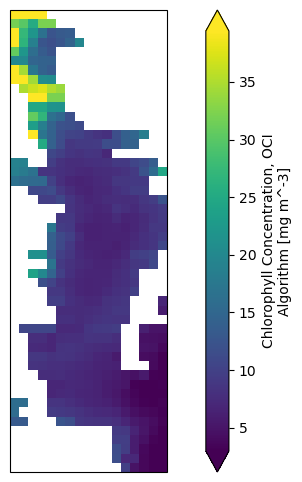

In [25]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


chl_sub = ds1['chlor_a'].sel(
    lat = slice(38.8, 36.7), 
    lon = slice(-76.5, -75.8)
)

#plot 
ax = chl_sub.plot(
    robust=True,
    figsize=(10, 6),
    subplot_kws={"projection": ccrs.PlateCarree()}
)


## Open all plots

In [26]:
ds = xr.open_mfdataset(
    fileset,
    combine="nested",
    concat_dim="time")
ds

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 28, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    chlor_a  (time, lat, lon) float32 4GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 22kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/64)
    product_name:                      PACE_OCI.20240609_20240616.L3m.8D.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         12048072
    data_minimum:                      0.0009999998
    data_maximum:                      99.543304

## Plot all

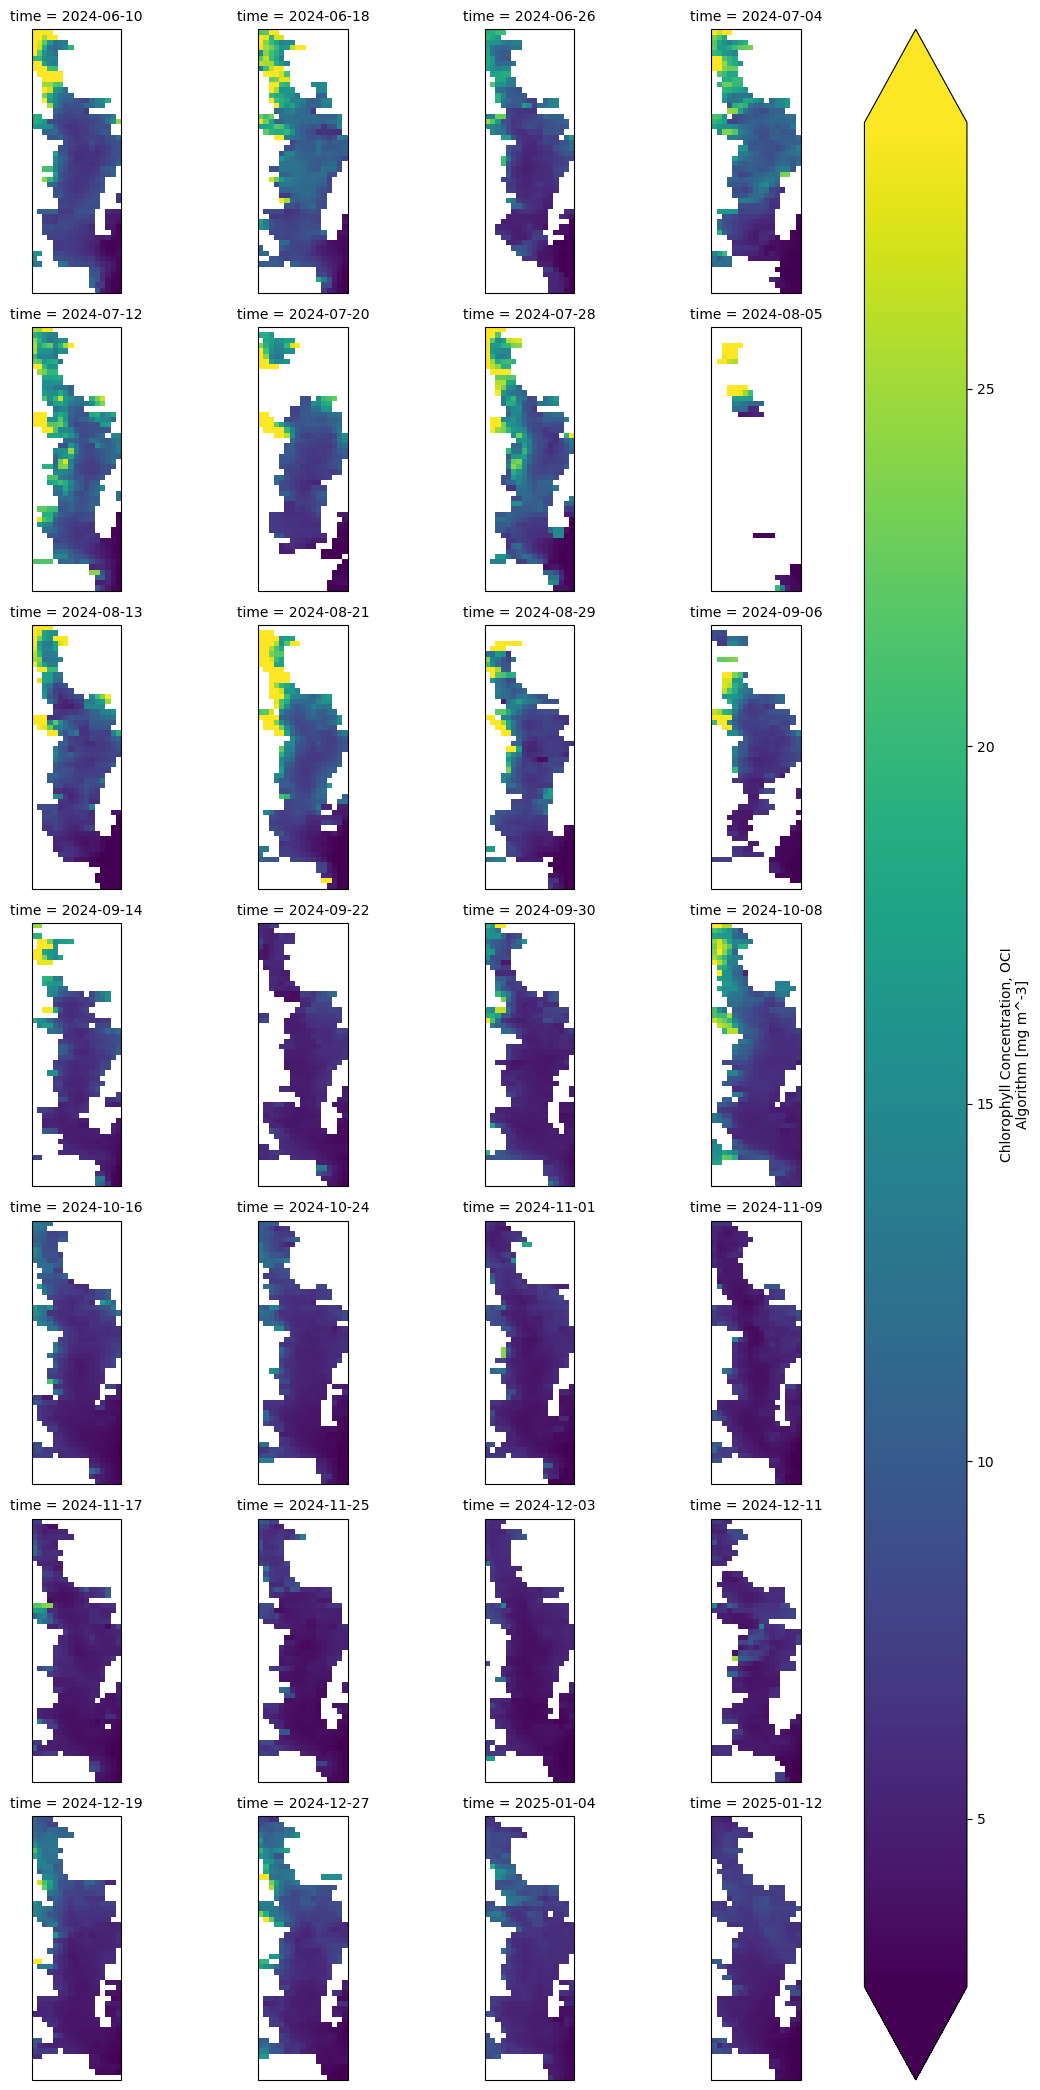

In [29]:
chl_all = ds['chlor_a'].sel(
    lat = slice(38.8, 36.7), 
    lon = slice(-76.5, -75.8)
)

import cartopy.crs as ccrs
chl_all.plot(
    col="time",            # one panel per 8D
    col_wrap=4,            # 4 columns per row
    robust=True,           # ignore outliers for color scale
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree()
)